# - Zillow Economics Data

### En el presente notebook se darán los resultados generales evaluando en conjunto los archivos seleccionados ya que los problemas que presentan son similares.

In [42]:
from evaluar import *

In [74]:
# Importamos librerías necesarias
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns', None) # Mostrar todas las columnas

In [44]:
csv_files = glob.glob('*.csv')
lista_data = []
  
# Creamos un bucle que recorre cada archivo csv de la carpeta, crea un df y lo agrega a una lista
for filename in csv_files:
    data = pd.read_csv(filename, encoding='cp1252')
    lista_data.append(data)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12368\3120624048.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, encoding='cp1252')


In [45]:
# Separamos de la lista el df que contiene el diccionario de variables
DataDictionary = lista_data.pop(4)

In [46]:
lst_keys = []
for path in csv_files:
    filename = os.path.split(path)[1]
    filename_mod = path.split('.')[0]
    lst_keys.append(filename_mod)

In [47]:
nameDicc = lst_keys.pop(4)

In [48]:
# Diccionario que contiene cada df y le asigna como key el nombre del archivo correspondiente
dicc_df={}
for e in range(len(lst_keys)):
    key = lst_keys[e]
    df = lista_data[e] 
    dicc_df[key] = df

### - Valores Faltantes (Porcentaje)

In [49]:
vf = val_null(dicc_df)
vf


73.38846511627908

### - Registros Duplicados (Porcentaje)

In [50]:
rd =reg_dup(dicc_df)
rd

0.0

### - Outliers (Porcentaje)

In [51]:
out = cantidad_outliers(dicc_df)
out

1.65

# - GRÁFICOS

## - VALORES FALTANTES

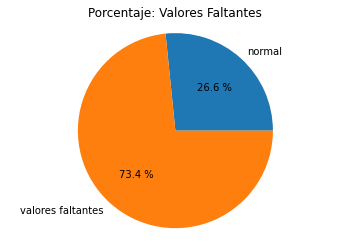

In [52]:


rest = 100-vf

g = [rest,vf]
nombres = ["normal", "valores faltantes"]

plt.pie(g, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title('Porcentaje: Valores Faltantes')
plt.show()

## - REGISTROS DUPLICADOS

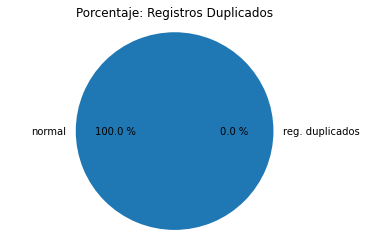

In [53]:
rest = 100-rd

g = [rest,rd]
nombres = ["normal", "reg. duplicados"]

plt.pie(g, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title('Porcentaje: Registros Duplicados')
plt.show()

## - OUTLIERS

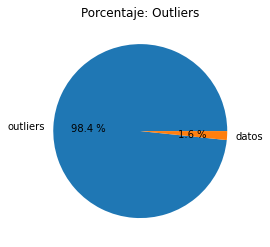

In [54]:
rest = 100-out
nombres = ['outliers','datos']
g = [rest,out]
plt.pie(g, labels=nombres, autopct="%0.1f %%")
plt.title('Porcentaje: Outliers')
plt.show()

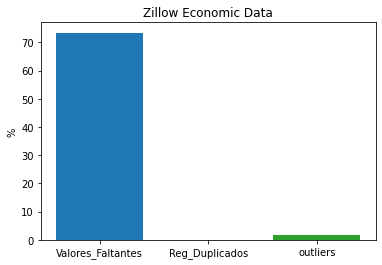

In [55]:
out_n = ["outliers"]

vf_n = ['Valores_Faltantes']

reg_d_n = ['Reg_Duplicados']



plt.bar(vf_n, vf)
plt.bar(reg_d_n, rd)
plt.bar(out_n, out)

plt.ylabel('%')
plt.title('Zillow Economic Data')
plt.show()


---

### Regiones que no presentan ningun valor en algunas columnas

Esto se da en todos los datasets de time series, se analizará sólo para state para ejemplificarlo.

In [56]:
dicc_df_aux = {'State_time_series' : dicc_df['State_time_series']}

In [69]:
# Filtro state_time_series según elementos vacíos, RegionName y perido de estudio

for key in dicc_df_aux:
    if 'Date' not in dicc_df_aux[key].columns:  
            continue
    else:  
        dicc_df_aux[key] = dicc_df_aux[key][dicc_df_aux[key]['Date']>='2012-01-01']
    for col in dicc_df_aux[key].columns:
        states = dicc_df_aux[key].RegionName
        state = dicc_df_aux[key].RegionName.unique()
        for st in state:
            nan = len(dicc_df_aux[key][col][(dicc_df_aux[key][col].isnull() & (states==st))])
            if nan >= 71: # cantidad de meses
                print(col,'\n', st, nan)
#                st_null = dicc_df_aux[key][col][(dicc_df_aux[key][col].isnull() & (states==st))]

#            print(col,'\n', st, st_null, '\n') 

DaysOnZillow_AllHomes 
 SouthDakota 72
InventorySeasonallyAdjusted_AllHomes 
 UnitedStates 71
InventoryRaw_AllHomes 
 UnitedStates 71
MedianListingPricePerSqft_1Bedroom 
 Delaware 72
MedianListingPricePerSqft_1Bedroom 
 Louisiana 72
MedianListingPricePerSqft_1Bedroom 
 Mississippi 72
MedianListingPricePerSqft_1Bedroom 
 NorthDakota 72
MedianListingPricePerSqft_1Bedroom 
 Tennessee 72
MedianListingPricePerSqft_1Bedroom 
 UnitedStates 71
MedianListingPricePerSqft_2Bedroom 
 NorthDakota 72
MedianListingPricePerSqft_2Bedroom 
 UnitedStates 71
MedianListingPricePerSqft_3Bedroom 
 NorthDakota 72
MedianListingPricePerSqft_3Bedroom 
 UnitedStates 71
MedianListingPricePerSqft_4Bedroom 
 NorthDakota 72
MedianListingPricePerSqft_4Bedroom 
 UnitedStates 71
MedianListingPricePerSqft_5BedroomOrMore 
 NorthDakota 72
MedianListingPricePerSqft_5BedroomOrMore 
 UnitedStates 71
MedianListingPricePerSqft_AllHomes 
 NorthDakota 72
MedianListingPricePerSqft_AllHomes 
 UnitedStates 71
MedianListingPricePerSq

#### Veamos un caso particular

- NorthDakota

In [78]:
dicc_df_aux['State_time_series'][dicc_df_aux['State_time_series']['RegionName'] == 'NorthDakota']

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
9503,2012-01-31,NorthDakota,119.000,1840.0,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.165375,NaN,3.190914,5000.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN,NaN,10.280028,NaN,10.233116,7.397737,NaN,7.296539,13.15,404.0,604.0,163200.0,NaN,148100.0,172400.0,202900.0,256300.0,165000.0,105800.0,127500.0,165000.0,170200.0,251400.0,940.0,936.0,0.766,875.0,944.0
9555,2012-02-29,NorthDakota,129.000,1752.0,1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.227889,NaN,3.227889,5000.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN,NaN,9.380699,NaN,9.061061,6.244131,NaN,5.985915,12.92,474.0,720.0,166500.0,NaN,148600.0,172900.0,203800.0,257300.0,165300.0,106200.0,127600.0,165300.0,170800.0,253000.0,988.0,985.0,0.778,890.0,998.0
9607,2012-03-31,NorthDakota,128.250,1635.0,1546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.277387,NaN,3.126954,5000.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN,NaN,9.418824,NaN,9.467507,7.876106,NaN,7.849667,12.97,489.0,750.0,165800.0,NaN,149100.0,173500.0,205400.0,258500.0,165800.0,106600.0,127900.0,165800.0,171400.0,254900.0,1030.0,1027.0,0.788,902.0,1042.0
9659,2012-04-30,NorthDakota,120.500,1496.0,1278.0,NaN,NaN

Hay que destacar que estos valores no podrán completarse con una medida de tendencia central si se aplica un filtro por RegionName, ya que no dispondrán de valores para poder calcularla. Por lo que se deberán dejar vacíos o completar con alguna medida de manera general, es decir, sin filtrar por RegionName. Estas son las únicas alternativas viables, ya que si estos elementos se eliminan estariamos eliminando registros con valores importantes.